**BUSINESS UNDERSTANDING**

SyriaTel is a telecommunications company in Syria that is experiencing customer churn. A percentage of their customers have discontinued use of their services for various reasons.
Tyhe impact of losing customers has serious financial implications as acquisition of new ones is much more difficult than customer retention.
A deep dive into the causes and customers expected to churn will give valuable insights to the sales and marketing teams.

**DATA EXPLORATION AND  UNDERSTANDING**

In [213]:
import pandas as pd 
import numpy as np 

In [214]:
# obtain the dataset and inspect it
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [220]:
# check for numbr of rows and columns of the dataframe
df.shape

(3333, 21)

In [224]:
#display data frame summary and features
df.info()
features = df.columns.to_list()
print("Column names (features):", features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

*FEATURES:*

    -state: the state the customer lives in.
    -account length: the number of days the customer has had an account.
    -area code: the area code of the customer
    -phone number: the phone number of the customer
    -international plan: true if the customer has the international plan, otherwise false
    -voice mail plan: true if the customer has the voice mail plan, otherwise false
    -number vmail messages: the number of voicemails the customer has sent
    -total day minutes: total number of minutes the customer has been in calls during the day
    -total day calls: total number of calls the user has done during the day
    -total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
    -total eve minutes: total number of minutes the customer has been in calls during the evening
    -total eve calls: total number of calls the customer has done during the evening
    -total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
    -total night minutes: total number of minutes the customer has been in calls during the night
    -total night calls: total number of calls the customer has done during the night
    -total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
    -total intl minutes: total number of minutes the user has been in international calls
    -total intl calls: total number of international calls the customer has done
    -total intl charge: total amount of money the customer was charged by the Telecom company for international calls
    -customer service calls: number of calls the customer has made to customer service
    -churn: true if the customer terminated their contract, otherwise false

***DATA CLEANING***

**1. Check for missing values, duplicated, irrelevant columns**

In [228]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

no missing values found

**2. Check for duplicates**

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

no duplicates found

**3. columns to list**

In [ ]:
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

***FEATURE ENGINEERING***

Churn will be the feature used for analysis 
Let's have a look at it's general distribution

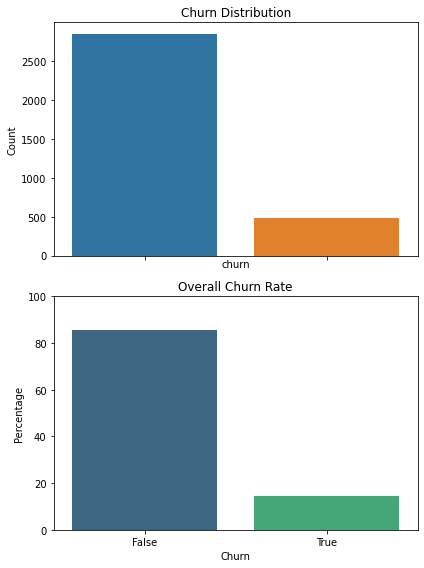

Churn Rate:
False    0.855086
True     0.144914
Name: churn, dtype: float64


In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Churn Distribution
sns.countplot(data=df, x='churn', ax=ax1)
ax1.set_title('Churn Distribution')
ax1.set_ylabel('Count')

# Overall Churn Rate
churn_rate = df['churn'].value_counts(normalize=True)
sns.barplot(x=churn_rate.index, y=churn_rate.values * 100, palette='viridis', ax=ax2)
ax2.set_xlabel('Churn')
ax2.set_ylabel('Percentage')
ax2.set_title('Overall Churn Rate')
ax2.set_ylim(0, 100)

# Show the plots
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print churn rate
print("Churn Rate:")
print(churn_rate)


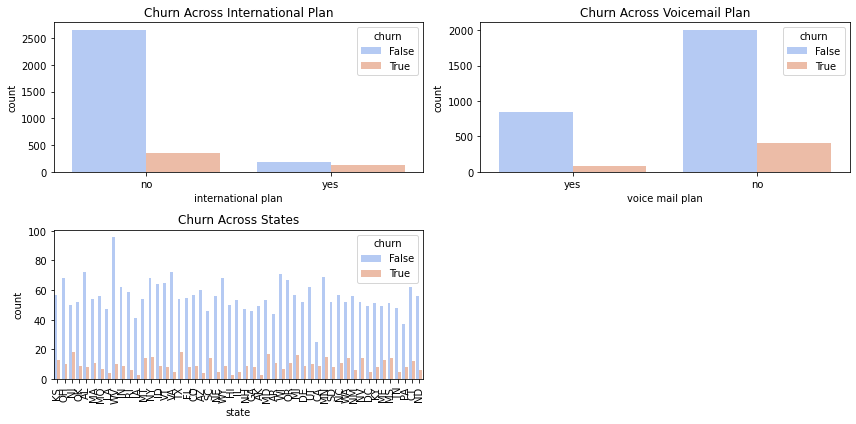

In [245]:
#Churn Across Categorical Features
#1
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x="international plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Across International Plan")

#2
plt.subplot(2, 2, 2)
sns.countplot(x="voice mail plan", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Across Voicemail Plan")

#3
plt.subplot(2, 2, 3)
sns.countplot(x="state", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Across States")
plt.xticks(rotation=90)

# # Churn vs. Area Code
# plt.subplot(2, 2, 4)
# sns.boxplot(x="churn", y="area code", data=df, palette="coolwarm")
# plt.title("Churn vs. Area Code")

plt.tight_layout()
plt.show()

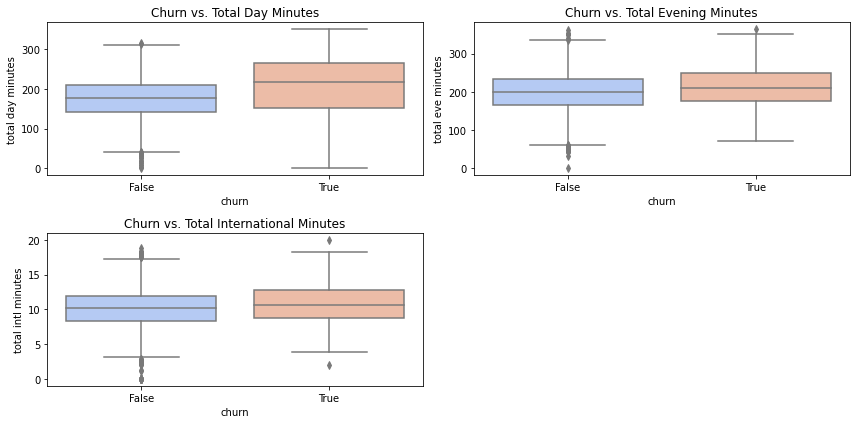

In [247]:
#Churn Across Numerical Features

#1
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x="churn", y="total day minutes", data=df, palette="coolwarm")
plt.title("Churn vs. Total Day Minutes")

#2
plt.subplot(2, 2, 2)
sns.boxplot(x="churn", y="total eve minutes", data=df, palette="coolwarm")
plt.title("Churn vs. Total Evening Minutes")

#3
plt.subplot(2, 2, 3)
sns.boxplot(x="churn", y="total intl minutes", data=df, palette="coolwarm")
plt.title("Churn vs. Total International Minutes")

plt.tight_layout()
plt.show()



<AxesSubplot:xlabel='area code'>

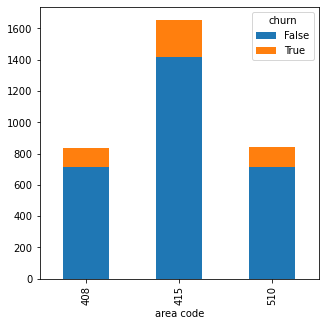

In [239]:
# Churn By Area Code
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

<AxesSubplot:xlabel='international plan'>

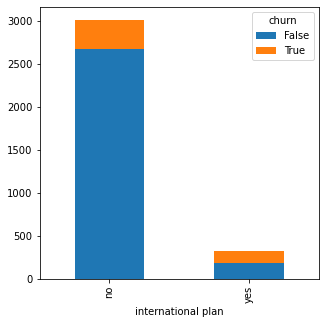

In [240]:
# Churn By Customers with International plan
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

<AxesSubplot:xlabel='voice mail plan'>

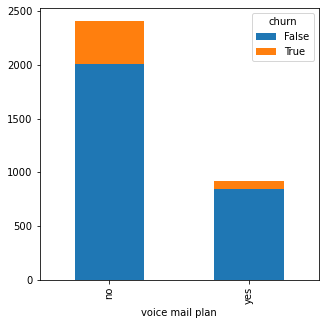

In [241]:
#Churn By Customers with Voice mail plan
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

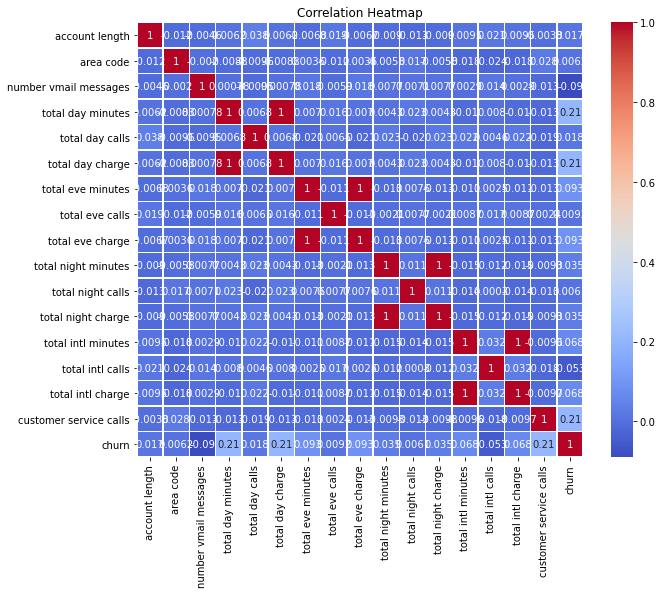

In [242]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

encode categorical cols

In [ ]:
# Discreet value integer encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# State is string and we want discreet integer values
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

#print (df['Voice mail plan'][:4])
print (df.dtypes)

Strip of Response values


In [ ]:
df.shape()

In [ ]:
# Convert boolean values to integers (0 or 1)
y = df['churn'].astype(int)

# Print the size of the resulting array
print(f"Size of y: {y.size}")
y.shape()

In [ ]:
df.drop(["churn"], axis = 1, inplace=True)
df.head()

In [ ]:
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
for col in numeric_cols:
    df[col] = df[col].astype(float)

X = df[numeric_cols].to_numpy()
X


In [ ]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already prepared your feature matrix X and target vector y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the performance using appropriate metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logreg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logreg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_logreg):.4f}")

In [ ]:
if len(y_test) == len(y_pred_logreg):
    conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
    print("Confusion Matrix for Logistic Regression:")
    print(conf_matrix_logreg)
else:
    print("Error: Inconsistent number of samples between y_test and y_pred_logreg.")

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and evaluated the logistic regression model
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logreg)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a random forest model
rf_model = RandomForestClassifier()

# Initialize stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model performance on each fold
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)
  # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold Accuracy: {fold_accuracy:.4f}")

# Compute average performance across all folds
average_accuracy = sum(fold_accuracy) / skf.n_splits
print(f"Average Accuracy: {average_accuracy:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest model
rf_model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the performance using appropriate metrics
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already prepared your feature matrix X and target vector y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN model (you can adjust the number of neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the performance using appropriate metrics
print("K-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree model (you can adjust the maximum depth)
dt_model = DecisionTreeClassifier(max_depth=5)

# Fit the decision tree model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance using appropriate metrics
print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")